In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import  precision_score, recall_score, f1_score, confusion_matrix


import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


2.15.0


In [2]:
file=open("socialmedia_addiction.csv")
data=pd.read_csv(file)

In [3]:
print(data.head)


<bound method NDFrame.head of       age  daily_social_media_usage(hours)  daily_screen_time(hours)  \
0      18                                3                         5   
1      34                                3                         6   
2      46                                3                         4   
3      53                                5                         3   
4      26                                5                        11   
...   ...                              ...                       ...   
1995   36                                4                         5   
1996   68                                4                         5   
1997   32                                3                         4   
1998   52                                6                        17   
1999   36                                9                        16   

     addiction_label  
0                 No  
1                 No  
2                Yes  
3            

In [4]:
print("Data size is :",data.shape)

Data size is : (2000, 4)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              2000 non-null   int64 
 1   daily_social_media_usage(hours)  2000 non-null   int64 
 2   daily_screen_time(hours)         2000 non-null   int64 
 3   addiction_label                  2000 non-null   object
dtypes: int64(3), object(1)
memory usage: 62.6+ KB
None


In [6]:
print("Data description :\n\n",data.describe())

Data description :

                age  daily_social_media_usage(hours)  daily_screen_time(hours)
count  2000.000000                      2000.000000               2000.000000
mean     47.958000                         6.808000                 11.631000
std      19.342371                         3.562511                  4.570917
min      15.000000                         3.000000                  3.000000
25%      32.000000                         4.000000                  8.000000
50%      47.000000                         6.000000                 12.000000
75%      65.000000                         9.000000                 16.000000
max      81.000000                        18.000000                 19.000000


In [7]:
variable_types = data.dtypes
print('variables type :\n\n',variable_types)

variables type :

 age                                 int64
daily_social_media_usage(hours)     int64
daily_screen_time(hours)            int64
addiction_label                    object
dtype: object


In [8]:
missing_values = data.isnull().sum()
print('missing values for each attribute :\n\n',missing_values)

missing values for each attribute :

 age                                0
daily_social_media_usage(hours)    0
daily_screen_time(hours)           0
addiction_label                    0
dtype: int64


In [9]:
data['addiction_label'] = data['addiction_label'].apply(lambda x: 0 if x == 'No' else 1)

In [10]:
print(data.head)

<bound method NDFrame.head of       age  daily_social_media_usage(hours)  daily_screen_time(hours)  \
0      18                                3                         5   
1      34                                3                         6   
2      46                                3                         4   
3      53                                5                         3   
4      26                                5                        11   
...   ...                              ...                       ...   
1995   36                                4                         5   
1996   68                                4                         5   
1997   32                                3                         4   
1998   52                                6                        17   
1999   36                                9                        16   

      addiction_label  
0                   0  
1                   0  
2                   1  
3        

In [11]:
X = data.drop('addiction_label', axis=1).values
y = data['addiction_label'].values


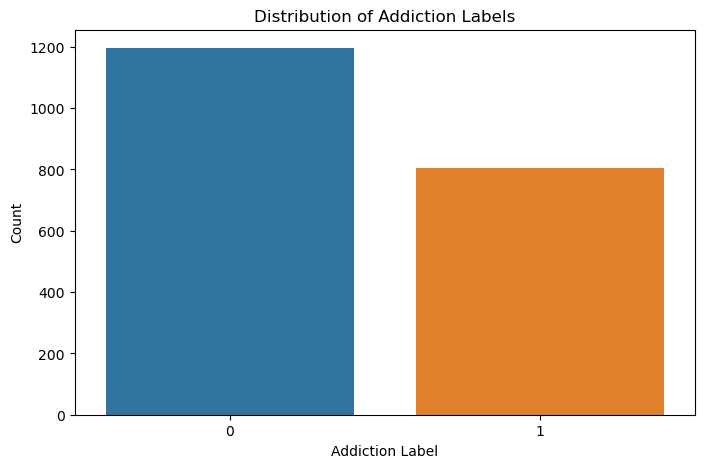

In [12]:

plt.figure(figsize=(8, 5))
sns.countplot(x='addiction_label', data=data)
plt.title('Distribution of Addiction Labels')
plt.xlabel('Addiction Label')
plt.ylabel('Count')
plt.show()

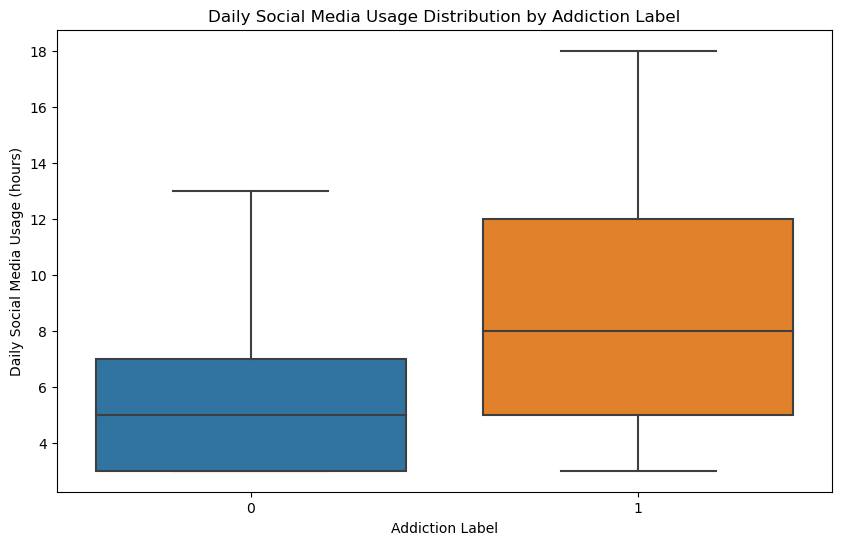

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='addiction_label', y='daily_social_media_usage(hours)', data=data)
plt.title('Daily Social Media Usage Distribution by Addiction Label')
plt.xlabel('Addiction Label')
plt.ylabel('Daily Social Media Usage (hours)')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1600, 3)
X_test shape: (400, 3)
y_train shape: (1600,)
y_test shape: (400,)


In [16]:

print("X_train shape:", X_train)
print("X_test shape:", X_test)
print("y_train shape:", y_train)
print("y_test shape:", y_test)

X_train shape: [[68 10 17]
 [79  4  9]
 [49  8 19]
 ...
 [36  7 11]
 [15 13 14]
 [59  3  7]]
X_test shape: [[36  7 11]
 [80  4  5]
 [47 15 18]
 ...
 [74 14 18]
 [23  3  4]
 [41  9 15]]
y_train shape: [0 0 0 ... 0 1 0]
y_test shape: [0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1
 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 0 0 1

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50


160/160 [==============================] - 2s 3ms/step - loss: 0.6668 - accuracy: 0.6852 - val_loss: 0.5277 - val_accuracy: 0.6469
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8344 - val_loss: 0.3800 - val_accuracy: 0.8250
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8766 - val_loss: 0.3226 - val_accuracy: 0.8188
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9242 - val_loss: 0.2592 - val_accuracy: 0.9781
Epoch 5/50
160/160 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9414 - val_loss: 0.2406 - val_accuracy: 0.9469
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9305 - val_loss: 0.2786 - val_accuracy: 0.8094
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9492 - val_loss: 0.1902 - val_accuracy: 0.9688
Epoc

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

13/13 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9725
Test accuracy: 0.9725000262260437


In [22]:
new_data = np.array([[53,5,3]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_probability = prediction[0, 0]
predicted_class = "Addicted" if predicted_probability >= 0.5 else "Not Addicted"

print(f'Predicted probability of addiction: {predicted_probability}')
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 98ms/step
Predicted probability of addiction: 0.9891011714935303
Predicted class: Addicted


In [23]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [25]:

test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

13/13 [==============================] - 0s 2ms/step - loss: 1.8789 - accuracy: 0.4175
Test accuracy: 0.41749998927116394


In [26]:
new_data = np.array([[53,5,3]])
new_data_scaled = scaler.transform(new_data)
prediction = model1.predict(new_data_scaled)
predicted_probability = prediction[0, 0]
predicted_class = "Addicted" if predicted_probability >= 0.5 else "Not Addicted"

print(f'Predicted probability of addiction: {predicted_probability}')
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 60ms/step
Predicted probability of addiction: 0.5657485723495483
Predicted class: Addicted


In [27]:


model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(32, activation='relu')) 
model2.add(layers.Dense(1, activation='sigmoid'))


In [28]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
model2.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
160/160 [==============================] - 1s 3ms/step - loss: 0.9222 - accuracy: 0.6672 - val_loss: 0.4907 - val_accuracy: 0.7625
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8672 - val_loss: 0.3829 - val_accuracy: 0.8875
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8984 - val_loss: 0.3123 - val_accuracy: 0.9625
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.9133 - val_loss: 0.2690 - val_accuracy: 0.9312
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9266 - val_loss: 0.2437 - val_accuracy: 1.0000
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9461 - val_loss: 0.2136 - val_accuracy: 0.9844
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9414 - val_loss: 0.2473 - val_accuracy: 0.8656
Epoch 

In [30]:

test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

13/13 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


In [31]:
new_data = np.array([[26,5,11]])
new_data_scaled = scaler.transform(new_data)
prediction = model2.predict(new_data_scaled)
predicted_probability = prediction[0, 0]
predicted_class = "Addicted" if predicted_probability >= 0.5 else "Not Addicted"

print(f'Predicted probability of addiction: {predicted_probability}')
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 117ms/step
Predicted probability of addiction: 0.4360797107219696
Predicted class: Not Addicted


In [32]:
def create_model(optimizer='adam', hidden_neurons=32):
    model = models.Sequential()
    model.add(layers.Dense(hidden_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
optimizers = ['adam', 'sgd']
hidden_neurons_list = [16, 32, 64]

In [34]:
results = []
for optimizer in optimizers:
    for hidden_neurons in hidden_neurons_list:
        model = create_model(optimizer=optimizer, hidden_neurons=hidden_neurons)
        history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
        results.append({'optimizer': optimizer, 'hidden_neurons': hidden_neurons, 'test_accuracy': test_acc, 'history': history})


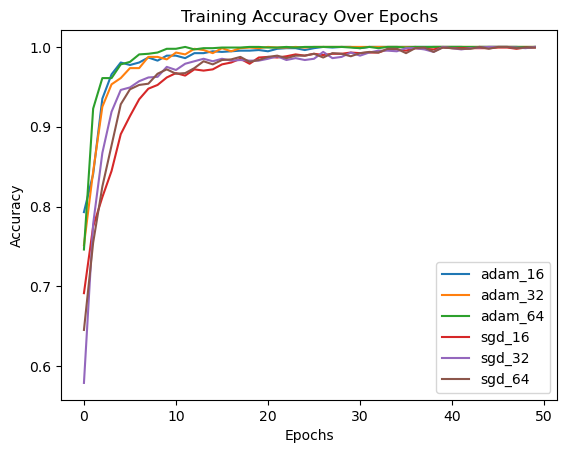

In [35]:
for result in results:
    plt.plot(result['history'].history['accuracy'], label=f"{result['optimizer']}_{result['hidden_neurons']}")

plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
for result in results:
    print(f"Test Accuracy for {result['optimizer']}_{result['hidden_neurons']}: {result['test_accuracy']}")

Test Accuracy for adam_16: 1.0
Test Accuracy for adam_32: 1.0
Test Accuracy for adam_64: 1.0
Test Accuracy for sgd_16: 1.0
Test Accuracy for sgd_32: 1.0
Test Accuracy for sgd_64: 1.0


In [37]:
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)


y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with L-BFGS: {accuracy}')

Accuracy with L-BFGS: 0.995


In [38]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:

print("Scaled X_train:")
print(X_train_scaled)

print("\nScaled X_test:")
print(X_test_scaled)


Scaled X_train:
[[ 1.03894732  0.91444754  1.17665494]
 [ 1.60699556 -0.78060872 -0.56633583]
 [ 0.05777309  0.34942878  1.61240263]
 ...
 [-0.61355665  0.06691941 -0.13058814]
 [-1.69801238  1.76197566  0.5230334 ]
 [ 0.57418058 -1.0631181  -1.00208352]]

Scaled X_test:
[[-0.61355665  0.06691941 -0.13058814]
 [ 1.6586363  -0.78060872 -1.43783121]
 [-0.04550841  2.32699442  1.39452878]
 ...
 [ 1.34879181  2.04448504  1.39452878]
 [-1.28488638 -1.0631181  -1.65570505]
 [-0.3553529   0.63193816  0.74090725]]


In [40]:

svm_model = SVC(kernel='linear', probability=True)  

In [41]:
svm_model.fit(X_train_scaled, y_train)



SVC(kernel='linear', probability=True)

In [42]:
svm_predictions = svm_model.predict(X_test_scaled)


In [43]:
accuracy = accuracy_score(y_test, svm_predictions)
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.9925


In [44]:
new_data = np.array([
    [18, 3, 5],
    [34, 3, 6],
    [46, 3, 4],
    [53, 5, 3],
    [26, 5, 11],
    [75, 9, 14],
    [79,4,13]
])
new_data_scaled = scaler.transform(new_data)



In [45]:
svm_predictions= svm_model.predict(new_data_scaled)


In [46]:
predicted_labels = ["Addicted" if pred == 1 else "Not Addicted" for pred in svm_predictions]



In [47]:

print("Predictions for new_data:")
for pred, label in zip(svm_predictions, predicted_labels):
    print(f"Predicted class: {pred}, Label: {label}")



Predictions for new_data:
Predicted class: 0, Label: Not Addicted
Predicted class: 0, Label: Not Addicted
Predicted class: 1, Label: Addicted
Predicted class: 1, Label: Addicted
Predicted class: 0, Label: Not Addicted
Predicted class: 0, Label: Not Addicted
Predicted class: 0, Label: Not Addicted


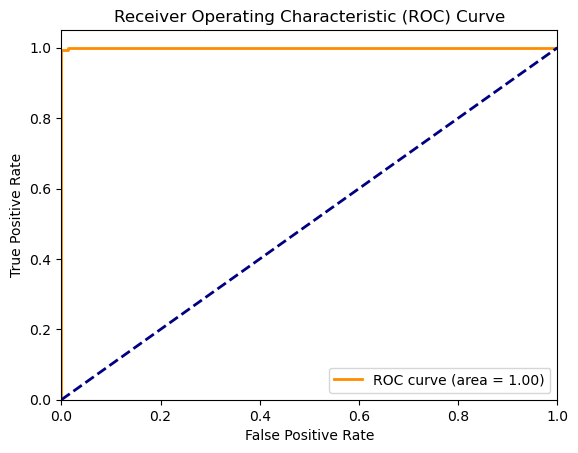

In [58]:
y_scores = svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

error_rate = 1 - accuracy

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Error Rate: {error_rate}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[233   0]
 [  0 167]]
Error Rate: 0.0


In [51]:
recall = recall_score(y_test, y_pred)

print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

F1 Score: 1.0
Confusion Matrix:
[[233   0]
 [  0 167]]


In [52]:
y_pred_ann_prob=model.predict(X_test)
y_pred_ann=(y_pred_ann_prob>0.5).astype(int)

classification_report_ann=classification_report(y_test,y_pred_ann)
print("Classification report For ANN : ") 
print(classification_report_ann)

Classification report For ANN : 
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       233
           1       1.00      0.05      0.09       167

    accuracy                           0.60       400
   macro avg       0.80      0.52      0.42       400
weighted avg       0.76      0.60      0.47       400

